In [1]:
import pyomo.environ as pyo
import random
import matplotlib.pyplot as plt

In [2]:
path_solver = '../solvers/glpk-4.65/w64/glpsol.exe'

### Mapa de N cidades aletoreamente geradas

In [3]:
mapa_lim = [[10,100],[20,120]] 

def gera_ponto(mapa_lim):
    x = random.randrange(mapa_lim[0][0], mapa_lim[0][1])
    y = random.randrange(mapa_lim[1][0], mapa_lim[1][1])
    return x, y

def gera_mapa(mapa_lim, n_cid):
    cidades = []
    while len(cidades) < n_cid:
        cidades.append(gera_ponto(mapa_lim))
        
    
    return cidades


In [4]:
gera_ponto(mapa_lim=mapa_lim)
N = 5

In [5]:
cid  = gera_mapa(mapa_lim, N)
len(cid)

5

(10.0, 100.0)

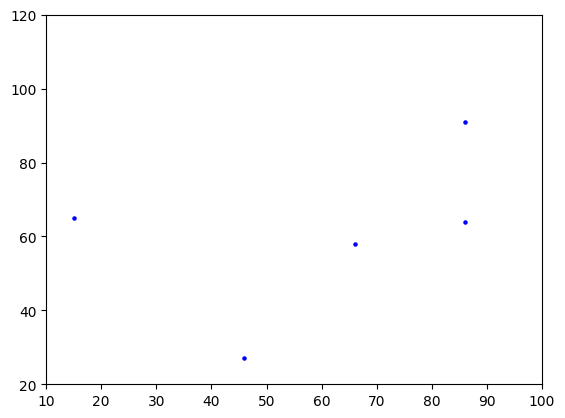

In [6]:
cid[0]
figura, ax = plt.subplots()
for i in range(N):
    ax.scatter(cid[i][0],cid[i][1],c='b', s=5)
#plt.scatter(cid[1][0],cid[1][1])
plt.ylim(mapa_lim[1])
plt.xlim(mapa_lim[0])


In [7]:
indx = random.randint(0,N-1)
P1 = cid[indx]


In [8]:
indx = random.randint(0,N-1)
P2 = cid[indx]

In [9]:
def dist(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**(0.5)


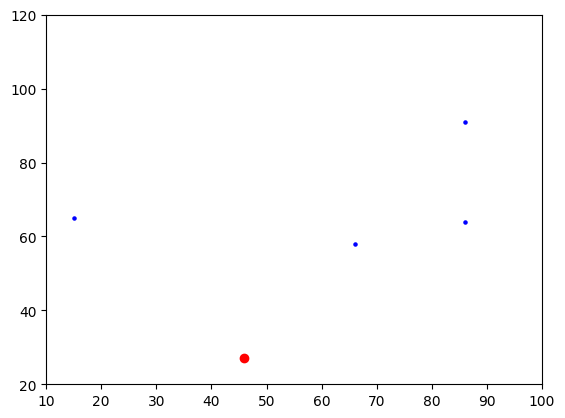

In [10]:

ax.scatter(P1[0],P1[1],c='r')
#plt.plot([P1[0],P1[1]])
figura#.show()

### Matriz de distanças

In [11]:
dist(P1,P2)
#P1,P2
d = []
for i, p1 in enumerate(cid):
    d_aux = [] 
    for j, p2 in enumerate(cid):
        #print(i,"---",dist(P1,p)) 
        d_aux.append(dist(p1,p2))
    #d_aux.append(dist(cid[0],p1))
    d.append(d_aux)
#d.append(d[0])
d

[[0.0, 75.61084578286372, 75.47184905645283, 27.0, 38.58756276314948],
 [75.61084578286372,
  0.0,
  49.040799340956916,
  71.00704190430693,
  51.478150704935004],
 [75.47184905645283,
  49.040799340956916,
  0.0,
  54.48853090330111,
  36.89173349139343],
 [27.0, 71.00704190430693, 54.48853090330111, 0.0, 20.8806130178211],
 [38.58756276314948,
  51.478150704935004,
  36.89173349139343,
  20.8806130178211,
  0.0]]

In [12]:
from itertools import permutations
model = pyo.ConcreteModel()

model.I = pyo.RangeSet(N)
#model.J = pyo.RangeSet(N)


In [13]:
indx_perm = permutations(model.I, N)
#for perm in indx_perm:
 #   print(perm)
perm_1fixo = []
for prm in indx_perm:
    if prm[0] == 1:
        perm_1fixo.append(prm)
#print(perm_1fixo)

caminhos = []
for prm in perm_1fixo:
    aux = []
    aux.append(prm)
    #print(prm)
    for i in range(N-1):
        aux.append((prm[i], prm[i+1]))
     #   print(prm[i], prm[i+1])
    aux.append((prm[N-1], 1))
    #print(prm[N-1], 1)
    caminhos.append(aux)


len(caminhos),len(caminhos[0])

model.PermP1fixo = pyo.RangeSet(len(caminhos))

def med_cam(model, prm):
    dist_t = 0
    #print(caminhos[prm-1][0], prm)
    for i in model.I:
        #print(i, caminhos[prm-1][i])
        x = caminhos[prm-1][i][0]
        y = caminhos[prm-1][i][1]

        #print(d[x-1][y-1])
        dist_t = dist_t + d[x-1][y-1]
    return dist_t


s = []
for prm in model.PermP1fixo:
    s.append(med_cam(model, prm))
min_s = min(s)
print(s.index(min(s))+1, min(s))
caminhos[s.index(min(s))]
#caminhos
#s
#s[s.values==min(s)]
#import numpy as np
#S = np.array(s)
#np.where(x==min(S),S)

2 209.42399163303517


[(1, 2, 3, 5, 4), (1, 2), (2, 3), (3, 5), (5, 4), (4, 1)]

In [14]:
model.d = pyo.Param(model.I, model.I, rule=lambda model, i, j: d[i-1][j-1])
model.d.pprint()

d : Size=25, Index=d_index, Domain=Any, Default=None, Mutable=False
    Key    : Value
    (1, 1) :                0.0
    (1, 2) :  75.61084578286372
    (1, 3) :  75.47184905645283
    (1, 4) :               27.0
    (1, 5) :  38.58756276314948
    (2, 1) :  75.61084578286372
    (2, 2) :                0.0
    (2, 3) : 49.040799340956916
    (2, 4) :  71.00704190430693
    (2, 5) : 51.478150704935004
    (3, 1) :  75.47184905645283
    (3, 2) : 49.040799340956916
    (3, 3) :                0.0
    (3, 4) :  54.48853090330111
    (3, 5) :  36.89173349139343
    (4, 1) :               27.0
    (4, 2) :  71.00704190430693
    (4, 3) :  54.48853090330111
    (4, 4) :                0.0
    (4, 5) :   20.8806130178211
    (5, 1) :  38.58756276314948
    (5, 2) : 51.478150704935004
    (5, 3) :  36.89173349139343
    (5, 4) :   20.8806130178211
    (5, 5) :                0.0


In [15]:
model.X = pyo.Var(model.I, model.I, within=pyo.NonNegativeIntegers)

In [16]:
def obj(model):
    return pyo.summation(model.d, model.X)

model.obj = pyo.Objective(rule=obj, sense=pyo.minimize)


In [ ]:

def rule_1row(model,i):
    """
    Sum of values of rows of the matrix of distances == 1.
    """
#    if i == N:
#        return sum(model.X[i,j] for j in model.J if j>=i) == 0
#    if i == 1:
#        return sum(model.X[i,j] for j in modei) == 2
    return ((sum(model.X[i,j] for j in model.I if i!=j) == 1))

def rule_1col(model,j):
    """
    Sum of values of columns matrix of distances == 1.
    """
    #if j == 1:
    #    return sum(model.X[i,j] for i in model.I) == 0
    return sum(model.X[i,j] for i in model.I if i!=j) == 1

def rule_triag_sup(model,i):
    """
    Sum of values of supperior triangular (up the diagonal) matrix of distances == 1,2,...,N-1.
    """
    if i == N:
        #return sum(model.X[i,j] for j in model.I if j>=i) == 0
        return sum(model.X[i,j] for j in model.I if j>=i)

    #return sum(model.X[i,j] for j in model.I if j>=i) >= 1
    return sum(model.X[i,j] for j in model.I if j>=i)

def rule_triag_inf(model,j):
    """
    Sum of values of supperior triangular (up the diagonal) matrix of distances == 1,2,...,N-1.
    """
    if j == N:
        return sum(model.X[i,j] for i in model.I if i>=j) == 0
    #if i == 1:
    #    return sum(model.X[i,j] for j in model.J if j>=i) == 1
    return sum(model.X[i,j] for i in model.I if i>=j) >= 1


def rule_trace(model):
    return sum(model.X[i,i] for i in model.I) == 0

def rule_n(model,i):
    return sum(rule_triag_sup(model, n) for n in model.I) == model.u[i]


#def rule_N_n(model,i):
#    return sum(rule_triag_inf(model, n) for n in model.I) == (N-model.u[i])

def rule3(model,i,j):
    if i!=j:
        return model.u[i] - model.u[j] + N*model.X[i,j] <= N-1
    else:
        return model.u[i] - model.u[j] == 0


model.R1r = pyo.Constraint(model.I, rule=rule_1row)
model.R1c = pyo.Constraint(model.I, rule=rule_1col)
model.Rtrace = pyo.Constraint(rule=rule_trace)

model.U = pyo.RangeSet(2,N)
model.u = pyo.Var(model.I, within=pyo.NonNegativeIntegers, bounds=(0,N-1))
model.R3 = pyo.Constraint(model.I, model.U, rule=rule3)
#model.n = pyo.Constraint(rule=rule_n)
#model.N_n = pyo.Constraint(model.U,rule=rule_N_n)
#model.R3 = pyo.Constraint(model.I,rule=lambda mode, i: model.X[i,i]==0)

#model.R4 = pyo.Constraint(expr=model.X[1,4]==0)

In [17]:
rule_triag_sup(model, 1)

In [18]:
model.R1r.pprint()
model.d.pprint()

R1r : Size=5, Index=I, Active=True
    Key : Lower : Body                              : Upper : Active
      1 :   1.0 : X[1,2] + X[1,3] + X[1,4] + X[1,5] :   1.0 :   True
      2 :   1.0 : X[2,1] + X[2,3] + X[2,4] + X[2,5] :   1.0 :   True
      3 :   1.0 : X[3,1] + X[3,2] + X[3,4] + X[3,5] :   1.0 :   True
      4 :   1.0 : X[4,1] + X[4,2] + X[4,3] + X[4,5] :   1.0 :   True
      5 :   1.0 : X[5,1] + X[5,2] + X[5,3] + X[5,4] :   1.0 :   True
d : Size=25, Index=d_index, Domain=Any, Default=None, Mutable=False
    Key    : Value
    (1, 1) :                0.0
    (1, 2) :  75.61084578286372
    (1, 3) :  75.47184905645283
    (1, 4) :               27.0
    (1, 5) :  38.58756276314948
    (2, 1) :  75.61084578286372
    (2, 2) :                0.0
    (2, 3) : 49.040799340956916
    (2, 4) :  71.00704190430693
    (2, 5) : 51.478150704935004
    (3, 1) :  75.47184905645283
    (3, 2) : 49.040799340956916
    (3, 3) :                0.0
    (3, 4) :  54.48853090330111
    (3, 5) :  36

In [19]:
solver = pyo.SolverFactory('glpk', executable=path_solver)
solver.solve(model, tee=False)

{'Problem': [{'Name': 'unknown', 'Lower bound': 209.423991633035, 'Upper bound': 209.423991633035, 'Number of objectives': 1, 'Number of constraints': 31, 'Number of variables': 31, 'Number of nonzeros': 93, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '9', 'Number of created subproblems': '9'}}, 'Error rc': 0, 'Time': 0.11970305442810059}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [20]:
model.obj(),min_s

(209.42399163303517, 209.42399163303517)

In [21]:
for i in model.I:
    for j in model.I:
#        print(i,j,"-----",modelo.X[i,j](), end='')
        print(model.X[i,j](), end=' ')
    print("")

0.0 1.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 
1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 
